In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
import Transactions
import matplotlib.pyplot as plt
from Budget import Budget
from Budgets import Budgets
from pprint import pprint
import datetime
from collections import OrderedDict

In [18]:
all_trxs = Transactions.Transactions.from_csv('2018-01-14_All_Transactions.csv')

In [23]:
bs_expenses_dict = OrderedDict()

# Car
name = "Car"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-80, ["Auto Insurance"]))
bs_expenses_dict[name].add_budget(Budget(-70, ["Gas & Fuel"]))
bs_expenses_dict[name].add_budget(Budget(-100, ["Service & Parts"]))
bs_expenses_dict[name].add_budget(Budget(-300, ["Vehicle Property Tax"], amount_type='Yearly'))

# Utilities / Monthly Software
name = "Utilities & Monthly Software"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-130, ["Electricity"]))
bs_expenses_dict[name].add_budget(Budget(-56, ["Internet"]))
bs_expenses_dict[name].add_budget(Budget(-145, ["Mobile Phone"]))
bs_expenses_dict[name].add_budget(Budget(-65, ["Trash/Water"], name="Trash, Water"))
bs_expenses_dict[name].add_budget(Budget(-30, ["Natural Gas"]))
bs_expenses_dict[name].add_budget(Budget(-35, ["Software Services"], name="Software Servcices"))

# Home
name = "Home"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-250, ["HOA Fees"]))
bs_expenses_dict[name].add_budget(Budget(-120, ["Home Services", "Home Insurance"]))
bs_expenses_dict[name].add_budget(Budget(-1365, ["Mortgage & Rent"]))
bs_expenses_dict[name].add_budget(Budget(-150, ["Furnishings", "Home Improvement", "Home Supplies"], name="Home Impr_Furn_Supplies"))

# Personal Upkeep
name = "Personal Upkeep"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-66, ["Hair"], name="Hair-Heather"))
bs_expenses_dict[name].add_budget(Budget(-16, ["Hair (Andrew)"], name="Hair-Andrew"))
bs_expenses_dict[name].add_budget(Budget(-25, ["All Medical Expenses"]))
bs_expenses_dict[name].add_budget(Budget(-675, ["Groceries"]))

# Entertainment
name = "Entertainment"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-150, ["Amusement", "Movies & DVDs"], name="Fun Activities"))
bs_expenses_dict[name].add_budget(Budget(-150, ["Restaurants", "Fast Food"], name='Food Out'))
bs_expenses_dict[name].add_budget(Budget(-15, ["Coffee Shops"]))
bs_expenses_dict[name].add_budget(Budget(-60, ["Food at Work"]))
bs_expenses_dict[name].add_budget(Budget(-100, ["Gift"]))
bs_expenses_dict[name].add_budget(Budget(-200, ["Sports"]))

# Purchases
name = "Purchases"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-30, ["Books", "Software", "Hobbies"], name="Books, Games, Software"))
bs_expenses_dict[name].add_budget(Budget(-150, ["Clothing (Heather)"], name="Clothing-Heather"))
bs_expenses_dict[name].add_budget(Budget(-100, ["Clothing (Andrew)"], name="Clothing-Andrew"))
bs_expenses_dict[name].add_budget(Budget(-150, ["Electronics Hardware"], name="Electronics, Computers, Tech"))

# Travel
name = "Travel"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-800, ["Beach 2017", "Europe Trip 2016", "Vancouver 2017", "Hawaii 2018", "Vacation"], name="Vacations"))
bs_expenses_dict[name].add_budget(Budget(-325, ["Trips Home"]))

# Misc
name = "Misc"
bs_expenses_dict[name] = Budgets(name=name)
bs_expenses_dict[name].add_budget(Budget(-15, ["Tuition"], name="Educational Expenses"))
bs_expenses_dict[name].add_budget(Budget(-20, ["Work Expenses", "Office Supplies"], name="Work, Home Office"))
bs_expenses_dict[name].add_budget(Budget(-20, ["ATM Fee", "Bank Fee", "Fees & Charges", "Finance Charge", "Late Fee"], name="Fees and Charges"))
bs_expenses_dict[name].add_budget(Budget(-50, ["Federal Tax", "Taxes", "State Tax"], name="Taxes"))
bs_expenses_dict[name].add_budget(Budget(-15, ["Passport, License .."], name="Passport, License, etc"))
bs_expenses_dict[name].add_budget(Budget(-15, ["Cash & ATM"], name="Unknown - Cash, etc"))

bs_expenses = Budgets()
for name, bs in bs_expenses_dict.items():
    bs_expenses.extend(bs)
bs_expenses.display()

Auto Insurance            | $-80.00   | ['Auto Insurance']
Gas & Fuel                | $-70.00   | ['Gas & Fuel']
Service & Parts           | $-100.00  | ['Service & Parts']
Vehicle Property Tax      | $-25.00   | ['Vehicle Property Tax']
Electricity               | $-130.00  | ['Electricity']
Internet                  | $-56.00   | ['Internet']
Mobile Phone              | $-145.00  | ['Mobile Phone']
Trash, Water              | $-65.00   | ['Trash/Water']
Natural Gas               | $-30.00   | ['Natural Gas']
Software Servcices        | $-35.00   | ['Software Services']
HOA Fees                  | $-250.00  | ['HOA Fees']
Home Services, Home Insurance | $-120.00  | ['Home Services', 'Home Insurance']
Mortgage & Rent           | $-1365.00 | ['Mortgage & Rent']
Home Impr_Furn_Supplies   | $-150.00  | ['Furnishings', 'Home Improvement', 'Home Supplies']
Hair-Heather              | $-66.00   | ['Hair']
Hair-Andrew               | $-16.00   | ['Hair (Andrew)']
All Medical Expenses      | 

### Check for un-budgeted expenses

In [20]:
# Make exclusions for things that just happen or stuff I'm currently ignoring (income)
bs_exclude = Budgets()
bs_exclude.add_budget(Budget(0, ['Transfer', 'Investment Transfer', 'Credit Card Payment']))
bs_exclude.add_budget(Budget(0, ['Paycheck', 'Parents and Gifts', "Interest Income", "Unknown Income", "Credit Card Rewards"]))

not_in_bs = bs_expenses.get_transactions_not_in_budgets(all_trxs)
not_in_bs = bs_exclude.get_transactions_not_in_budgets(not_in_bs)
print(len(not_in_bs))
print(not_in_bs)

0
<empty Transactions object>


### Plot all expense vs budget figures

In [21]:
bs_expenses.plot(all_trxs, moving_average=[12], saveloc='./test/')

C:\Users\scribs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Make summary table of all budgets

In [10]:
bs_expenses.heatmap_table(all_trxs, moving_average=[12], saveloc='./test2')

C:\Users\scribs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Group by categories

In [35]:
bs_expense_cat = Budgets(name="Expenses")

for name in bs_expenses_dict:
    bs_expense_cat.add_budgets(bs_expenses_dict[name])
bs_expense_cat.display()

Car                       | $-275.00  | ['Auto Insurance', 'Gas & Fuel', 'Service & Parts', 'Vehicle Property Tax']
Utilities & Monthly Software | $-461.00  | ['Electricity', 'Internet', 'Mobile Phone', 'Trash/Water', 'Natural Gas', 'Software Services']
Home                      | $-1885.00 | ['HOA Fees', 'Home Services', 'Home Insurance', 'Mortgage & Rent', 'Furnishings', 'Home Improvement', 'Home Supplies']
Personal                  | $-782.00  | ['Hair', 'Hair (Andrew)', 'All Medical Expenses', 'Groceries']
Entertainment             | $-675.00  | ['Amusement', 'Movies & DVDs', 'Restaurants', 'Fast Food', 'Coffee Shops', 'Food at Work', 'Gift', 'Sports']
Purchases                 | $-430.00  | ['Books', 'Software', 'Hobbies', 'Clothing (Heather)', 'Clothing (Andrew)', 'Electronics Hardware']
Travel                    | $-1125.00 | ['Beach 2017', 'Europe Trip 2016', 'Vancouver 2017', 'Hawaii 2018', 'Vacation', 'Trips Home']
Misc                      | $-135.00  | ['Tuition', 'Work Exp

### Plot groupings

In [36]:
bs_expense_cat.plot(all_trxs, moving_average=[12], saveloc='./test_cat/')
bs_expense_cat.heatmap_table(all_trxs, moving_average=[12], saveloc='./test_cat/heatmap')

C:\Users\scribs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Group all expenses into one Budgets

In [39]:
expenses = Budgets(name="Expenses")
expenses.add_budgets(bs_expense_cat)
expenses.display()

Expenses                  | $-5768.00 | ['Auto Insurance', 'Gas & Fuel', 'Service & Parts', 'Vehicle Property Tax', 'Electricity', 'Internet', 'Mobile Phone', 'Trash/Water', 'Natural Gas', 'Software Services', 'HOA Fees', 'Home Services', 'Home Insurance', 'Mortgage & Rent', 'Furnishings', 'Home Improvement', 'Home Supplies', 'Hair', 'Hair (Andrew)', 'All Medical Expenses', 'Groceries', 'Amusement', 'Movies & DVDs', 'Restaurants', 'Fast Food', 'Coffee Shops', 'Food at Work', 'Gift', 'Sports', 'Books', 'Software', 'Hobbies', 'Clothing (Heather)', 'Clothing (Andrew)', 'Electronics Hardware', 'Beach 2017', 'Europe Trip 2016', 'Vancouver 2017', 'Hawaii 2018', 'Vacation', 'Trips Home', 'Tuition', 'Work Expenses', 'Office Supplies', 'ATM Fee', 'Bank Fee', 'Fees & Charges', 'Finance Charge', 'Late Fee', 'Federal Tax', 'Taxes', 'State Tax', 'Passport, License ..', 'Cash & ATM']


### Plot all expenses

In [40]:
expenses.plot(all_trxs, moving_average=[12], saveloc='./test_all/')
expenses.heatmap_table(all_trxs, moving_average=[12], saveloc='./test_all/heatmap')

C:\Users\scribs\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [28]:
for name in bs_expense_cat_dict:
    print(name)
    bs_expense_cat_dict[name].display()


Car


AttributeError: 'Budget' object has no attribute 'display'

In [412]:
start = datetime.datetime(2016, 5, 1)
stop = datetime.datetime(2017, 5, 1)
df = bs_expenses.to_df(all_trxs, start=start, stop=stop, moving_average=[12])

2016-05-01 00:00:00


In [8]:
df = bs_expenses.to_df(all_trxs, moving_average=[12])

In [414]:
print('no date range')
df = bs_expenses.to_df(all_trxs, moving_average=[1])
df

no date range


,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31
,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Auto Insurance (-80),80.00,80.00,80.00,-139.50,80.00,-139.50,80.00,80.00,80.00,-139.50,...,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
Gas & Fuel (-70),70.00,57.29,52.15,70.00,24.14,-43.14,68.28,70.00,-133.49,49.71,...,-19.02,-6.82,7.24,-8.37,4.63,18.41,44.74,-0.45,28.28,53.39
Service & Parts (-100),100.00,7.00,100.00,100.00,100.00,98.50,98.50,100.00,94.00,-554.22,...,100.00,100.00,-169.98,100.00,100.00,77.50,100.00,100.00,81.78,100.00
Vehicle Property Tax (-25.0),25.00,25.00,25.00,-241.51,25.00,25.00,25.00,25.00,25.00,25.00,...,25.00,-260.74,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
Electricity (-130),130.00,42.00,41.00,36.00,8.00,-23.00,-46.00,0.00,-43.00,-31.00,...,38.00,23.00,1.00,-27.00,-14.00,2.00,15.00,36.00,31.00,130.00
Internet (-56),56.00,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,...,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,1.06,56.00
Mobile Phone (-145),145.00,30.88,30.88,23.90,30.92,30.82,27.57,-44.77,30.21,30.86,...,1.48,1.42,1.42,1.42,1.18,1.18,1.18,1.12,1.12,145.00
"Trash, Water (-65)",36.44,13.05,26.99,-24.83,20.52,25.11,-30.10,65.00,3.45,-32.05,...,8.00,65.00,65.00,-40.41,26.74,20.28,-26.78,28.95,17.98,65.00
Natural Gas (-30),-8.90,-41.16,-1.47,8.34,10.14,12.78,13.87,13.87,13.87,13.87,...,30.00,30.00,30.00,30.00,30.00,15.01,12.74,-2.71,-26.41,30.00


In [445]:
print('no date range')
df = bs_expenses.to_df(all_trxs, moving_average=[12])
df

no date range
got default start date:  2016-01-29 00:00:00
got default start date:  2018-01-10 00:00:00


,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,...,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31
,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Auto Insurance (-80),80.000000,80.000000,80.000000,61.708333,61.708333,43.416667,43.416667,43.416667,43.416667,25.125000,...,-28.418333,-28.418333,-10.126667,-10.126667,-10.126667,-10.126667,8.165000,8.165000,26.456667,26.456667
Gas & Fuel (-70),70.000000,68.940833,67.453333,67.453333,63.631667,54.203333,54.060000,54.060000,37.102500,35.411667,...,22.807500,20.227500,24.425833,18.038333,12.590833,25.249167,24.835000,18.964167,17.649167,16.265000
Service & Parts (-100),100.000000,92.250000,92.250000,92.250000,92.250000,92.125000,92.000000,92.000000,91.500000,36.981667,...,28.735000,28.735000,6.361667,6.486667,6.486667,5.111667,59.630000,59.630000,58.111667,58.111667
Vehicle Property Tax (-25.0),25.000000,25.000000,25.000000,2.790833,2.790833,2.790833,2.790833,2.790833,2.790833,2.790833,...,18.433333,-5.378333,-5.378333,-5.378333,-5.378333,-5.378333,-5.378333,-5.378333,-5.378333,1.188333
Electricity (-130),130.000000,122.666667,115.250000,107.416667,97.250000,84.500000,69.833333,59.000000,44.583333,31.166667,...,9.000000,10.250000,12.250000,13.833333,12.666667,16.416667,20.250000,21.250000,20.500000,27.000000
Internet (-56),56.000000,51.421667,46.843333,42.265000,37.686667,33.108333,28.530000,23.951667,19.373333,14.795000,...,1.060000,1.060000,1.060000,1.060000,1.060000,1.060000,1.060000,1.060000,1.060000,5.638333
Mobile Phone (-145),145.000000,135.490000,125.980000,115.888333,106.381667,96.866667,87.080833,71.266667,61.700833,52.189167,...,1.135000,-1.323333,-3.773333,-5.952500,-2.123333,-4.542500,-7.015833,-9.494167,-2.660833,15.360000
"Trash, Water (-65)",62.620000,58.290833,55.123333,47.637500,43.930833,40.606667,32.681667,32.681667,27.552500,19.465000,...,11.895833,15.602500,18.926667,18.067500,14.879167,16.281667,16.720833,13.716667,16.323333,24.276667
Natural Gas (-30),26.758333,20.828333,18.205833,16.400833,14.745833,13.310833,11.966667,10.622500,9.278333,7.934167,...,21.533333,23.188333,24.623333,25.967500,27.311667,27.406667,27.312500,24.586667,19.885833,19.885833


In [423]:
sns.xkcd_rgb['medium green']

'#39ad48'

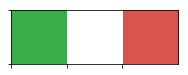

In [444]:
mypal = sns.xkcd_palette(["medium green", "white", "pale red"])
sns.palplot(mypal)

In [436]:
print(mypal)

[(0.2235294117647059, 0.6784313725490196, 0.2823529411764706), (1.0, 1.0, 1.0), (0.8509803921568627, 0.32941176470588235, 0.30196078431372547)]


In [449]:
df.columns

MultiIndex(levels=[[2016-01-31 00:00:00, 2016-02-29 00:00:00, 2016-03-31 00:00:00, 2016-04-30 00:00:00, 2016-05-31 00:00:00, 2016-06-30 00:00:00, 2016-07-31 00:00:00, 2016-08-31 00:00:00, 2016-09-30 00:00:00, 2016-10-31 00:00:00, 2016-11-30 00:00:00, 2016-12-31 00:00:00, 2017-01-31 00:00:00, 2017-02-28 00:00:00, 2017-03-31 00:00:00, 2017-04-30 00:00:00, 2017-05-31 00:00:00, 2017-06-30 00:00:00, 2017-07-31 00:00:00, 2017-08-31 00:00:00, 2017-09-30 00:00:00, 2017-10-31 00:00:00, 2017-11-30 00:00:00, 2017-12-31 00:00:00, 2018-01-31 00:00:00], [12]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

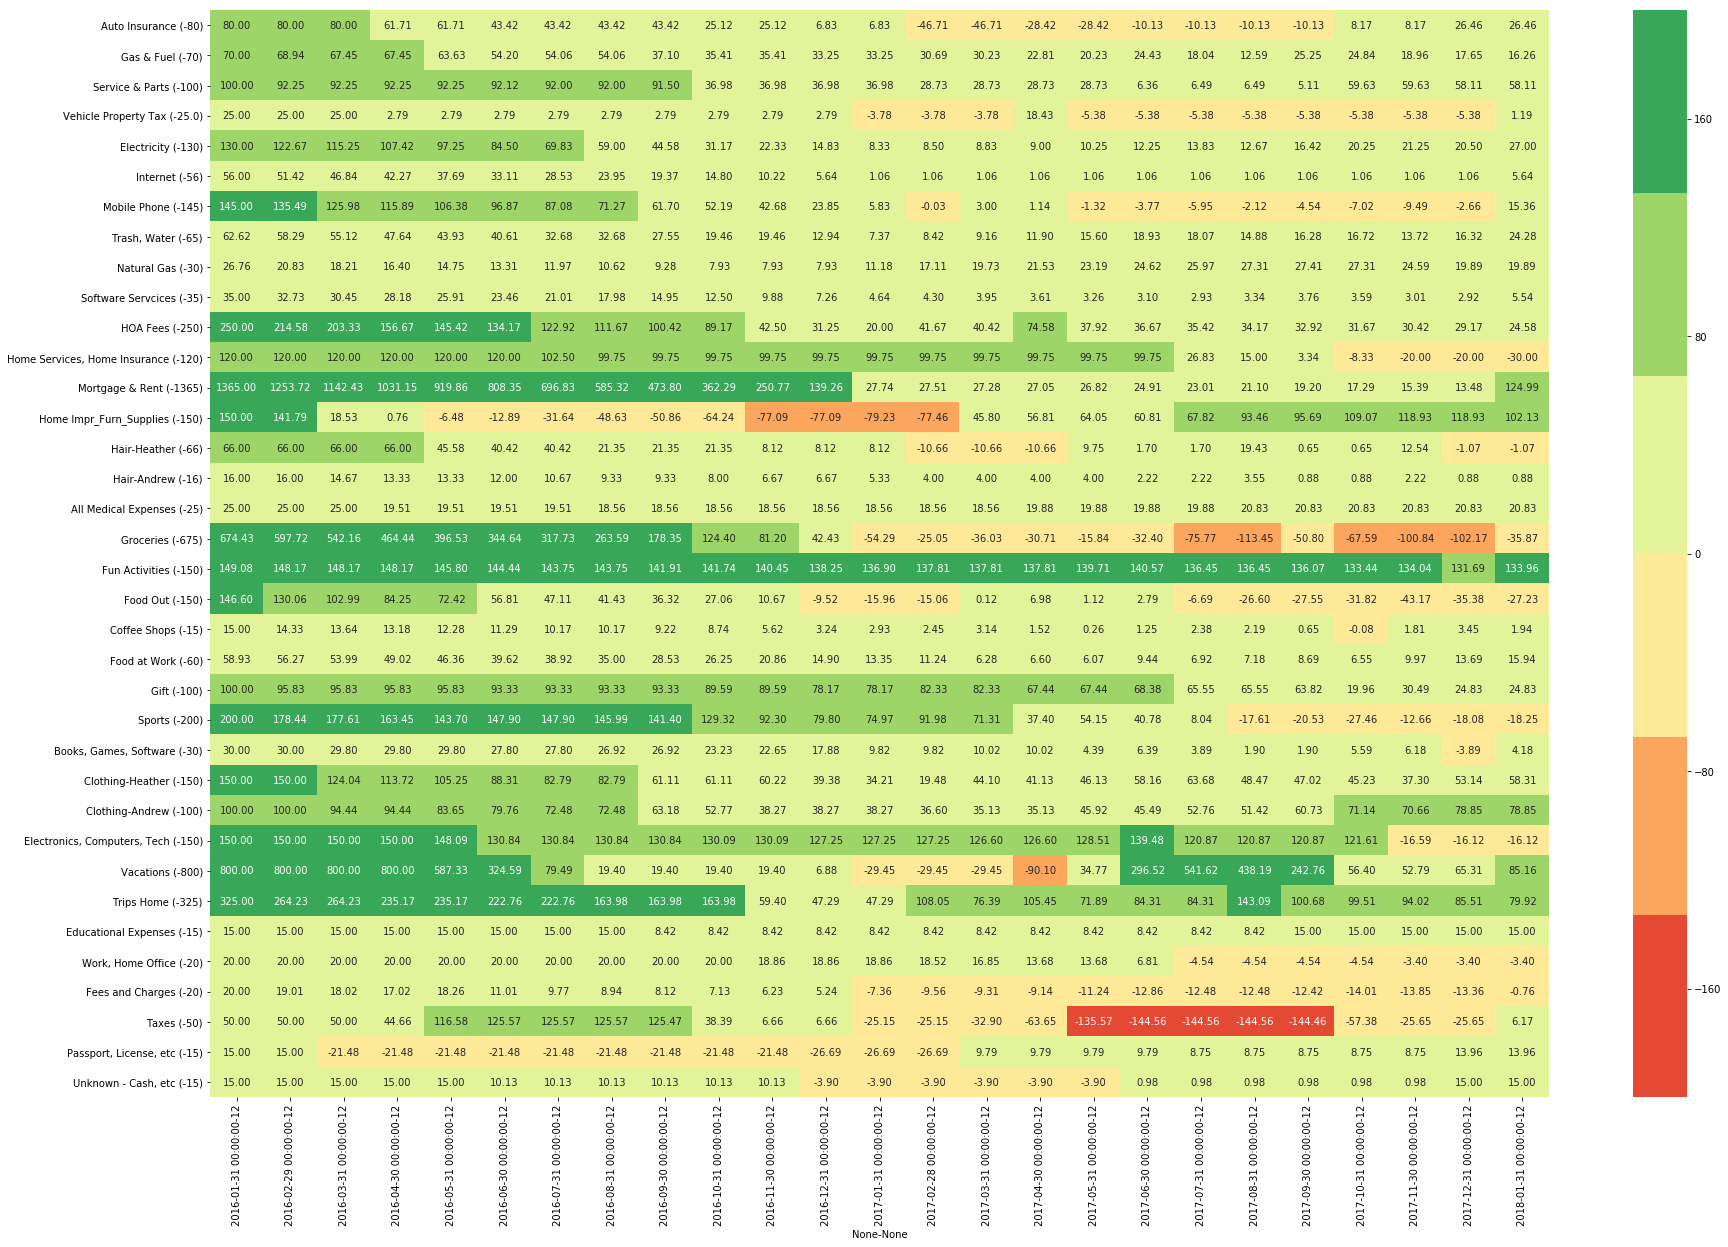

In [447]:
fig, ax = plt.subplots(figsize=(30,20))

sns.heatmap(df, annot=True, ax=ax, fmt='.2f', vmin=-200, vmax=200, center=0, cmap=sns.color_palette("RdYlGn"), )
fig.savefig('test')

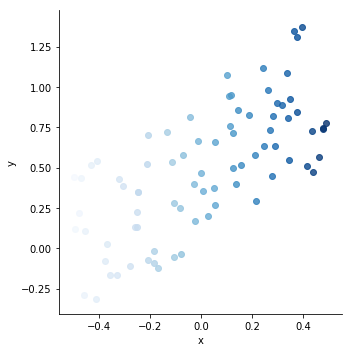

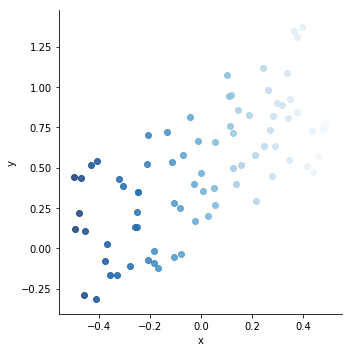

In [439]:
# Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# create data
x = np.random.rand(80) - 0.5
y = x+np.random.rand(80)
z = x+np.random.rand(80)
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
 
# Plot with palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues")
 
# reverse palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues_r")


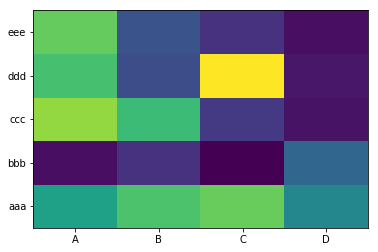

In [196]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()


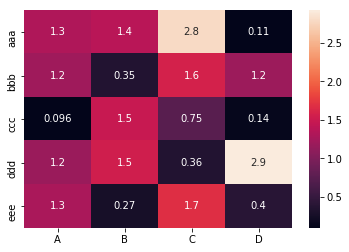

In [197]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)

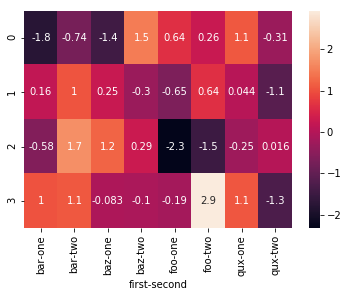

In [202]:
sns.heatmap(df, annot=True)

In [368]:
        trxs = Transactions.Transactions.from_csv('sample_transactions_1.csv')
        start = datetime.datetime(2016, 7, 5)
        end = datetime.datetime(2018, 4, 2)
        summarized = trxs.moving_average(start = start, stop = end, n= 1)
        print("averaged monthly with wider date range, n=3")
        print(summarized)

averaged monthly with wider date range, n=3
0: 2016-07-31 00:00:00 | 0.0 | 1-month Average | Two Trx
1: 2016-07-31 00:00:00 | 0.0 | 1-month Average | One Trx
2: 2016-08-31 00:00:00 | 0.0 | 1-month Average | Two Trx
3: 2016-08-31 00:00:00 | 0.0 | 1-month Average | One Trx
4: 2016-09-30 00:00:00 | 0.0 | 1-month Average | Two Trx
5: 2016-09-30 00:00:00 | 0.0 | 1-month Average | One Trx
6: 2016-10-31 00:00:00 | 0.0 | 1-month Average | Two Trx
7: 2016-10-31 00:00:00 | 0.0 | 1-month Average | One Trx
8: 2016-11-30 00:00:00 | 0.0 | 1-month Average | Two Trx
9: 2016-11-30 00:00:00 | 0.0 | 1-month Average | One Trx
10: 2016-12-31 00:00:00 | 0.0 | 1-month Average | Two Trx
11: 2016-12-31 00:00:00 | 0.0 | 1-month Average | One Trx
12: 2017-01-31 00:00:00 | -2.0 | 1-month Average | Two Trx
13: 2017-01-31 00:00:00 | 1.0 | 1-month Average | One Trx
14: 2017-02-28 00:00:00 | -4.0 | 1-month Average | Two Trx
15: 2017-02-28 00:00:00 | 2.0 | 1-month Average | One Trx
16: 2017-03-31 00:00:00 | -6.0 | 1-m

In [369]:
        b_dict = {
            "One": Budget(0, ['One Trx'], name='One Trx Budget'),
            "Two": Budget(0, ['Two Trx'], name='Two Trx Budget'),
        }

In [383]:
start = datetime.datetime(2017, 7, 5)
stop = datetime.datetime(2018, 4, 2)
print(b_dict['One'].tabulate_transactions(trxs, moving_average=2, start=start, stop=stop))

2016-06-01 00:00:00
0: 2016-06-30 00:00:00 | 0.0 | 2-month Average | One Trx Budget
1: 2016-07-31 00:00:00 | 0.0 | 2-month Average | One Trx Budget
2: 2016-08-31 00:00:00 | 0.0 | 2-month Average | One Trx Budget
3: 2016-09-30 00:00:00 | 0.0 | 2-month Average | One Trx Budget
4: 2016-10-31 00:00:00 | 0.0 | 2-month Average | One Trx Budget
5: 2016-11-30 00:00:00 | 0.0 | 2-month Average | One Trx Budget
6: 2016-12-31 00:00:00 | 0.0 | 2-month Average | One Trx Budget
7: 2017-01-31 00:00:00 | 0.5 | 2-month Average | One Trx Budget
8: 2017-02-28 00:00:00 | 1.5 | 2-month Average | One Trx Budget
9: 2017-03-31 00:00:00 | 2.5 | 2-month Average | One Trx Budget
10: 2017-04-30 00:00:00 | 3.5 | 2-month Average | One Trx Budget
11: 2017-05-31 00:00:00 | 4.5 | 2-month Average | One Trx Budget
12: 2017-06-30 00:00:00 | 5.5 | 2-month Average | One Trx Budget
13: 2017-07-31 00:00:00 | 6.5 | 2-month Average | One Trx Budget
14: 2017-08-31 00:00:00 | 7.5 | 2-month Average | One Trx Budget
15: 2017-09-30 

In [388]:
start = datetime.datetime(2017, 7, 5)
stop = datetime.datetime(2018, 4, 2)
print(b_dict['One'].tabulate_transactions(trxs, moving_average=2, start=start))

2017-07-05 00:00:00
0: 2017-07-31 00:00:00 | 6.5 | 2-month Average | One Trx Budget
1: 2017-08-31 00:00:00 | 7.5 | 2-month Average | One Trx Budget
2: 2017-09-30 00:00:00 | 8.5 | 2-month Average | One Trx Budget
3: 2017-10-31 00:00:00 | 9.5 | 2-month Average | One Trx Budget
4: 2017-11-30 00:00:00 | 10.5 | 2-month Average | One Trx Budget
5: 2017-12-31 00:00:00 | 11.5 | 2-month Average | One Trx Budget


In [385]:
Transactions.monthdelta(start, -1, 1)

datetime.datetime(2017, 6, 1, 0, 0)

In [386]:
start

datetime.datetime(2017, 7, 5, 0, 0)

In [397]:
ds = b_dict['One'].to_ds(trxs.slice_by_date(start=start), start=start, moving_average=[2])

In [398]:
ds

2017-07-31  2     3.5
2017-08-31  2     7.5
2017-09-30  2     8.5
2017-10-31  2     9.5
2017-11-30  2    10.5
2017-12-31  2    11.5
Name: One Trx Budget (0), dtype: float64